In [22]:
import pandas as pd
import numpy as np

In [23]:
combined_app_data_vader = pd.read_csv('combined_app_data_vader.csv')

In [24]:
combined_app_data_vader

,ID,CleanText,rating,source,sentiment_vader
0,1,professional,5,ReviewData1,neutral
1,2,buggy far mostly customer support always late ...,1,ReviewData1,positive
2,3,great easy navigate use super easy,5,ReviewData1,positive
3,4,airbus use affordable years ago shock discover...,1,ReviewData1,negative
4,5,easy use great rates love meeting host super f...,5,ReviewData1,positive
...,...,...,...,...,...
177095,84689,try type venice search function crashes immedi...,1,ReviewData2,negative
177096,84692,clean room many facilities u ask towel soap mi...,5,ReviewData2,positive
177097,84693,good guide travels asia good choice hotels pic...,2,ReviewData2,positive
177098,84694,useful times use,4,ReviewData2,positive


In [25]:
combined_app_data_vader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177100 entries, 0 to 177099
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ID               177100 non-null  int64 
 1   CleanText        177100 non-null  object
 2   rating           177100 non-null  int64 
 3   source           177100 non-null  object
 4   sentiment_vader  177100 non-null  object
dtypes: int64(2), object(3)
memory usage: 6.8+ MB


In [26]:
combined_app_data_vader.describe(include='all')

,ID,CleanText,rating,source,sentiment_vader
count,177100.000000,177100,177100.000000,177100,177100
unique,NaN,174153,NaN,2,3
top,NaN,professional,NaN,ReviewData1,positive
freq,NaN,2,NaN,115354,119669
mean,61386.353495,NaN,3.721293,NaN,NaN
std,41271.082010,NaN,1.684542,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN
25%,26274.000000,NaN,2.000000,NaN,NaN
50%,55745.500000,NaN,5.000000,NaN,NaN
75%,90151.250000,NaN,5.000000,NaN,NaN


In [30]:
combined_app_data_vader1 = combined_app_data_vader.drop_duplicates(subset=['CleanText'])
combined_app_data_vader1 = combined_app_data_vader1.reset_index(drop=True)
combined_app_data_vader1

,ID,CleanText,rating,source,sentiment_vader
0,1,professional,5,ReviewData1,neutral
1,2,buggy far mostly customer support always late ...,1,ReviewData1,positive
2,3,great easy navigate use super easy,5,ReviewData1,positive
3,4,airbus use affordable years ago shock discover...,1,ReviewData1,negative
4,5,easy use great rates love meeting host super f...,5,ReviewData1,positive
...,...,...,...,...,...
174148,84687,force closes overtime open please fix,1,ReviewData2,positive
174149,84689,try type venice search function crashes immedi...,1,ReviewData2,negative
174150,84692,clean room many facilities u ask towel soap mi...,5,ReviewData2,positive
174151,84693,good guide travels asia good choice hotels pic...,2,ReviewData2,positive


In [31]:
combined_app_data_vader1['sentiment_vader'].value_counts()

sentiment_vader
positive    117322
negative     32907
neutral      23924
Name: count, dtype: int64

In [32]:
positive_sample_CA = combined_app_data_vader1[combined_app_data_vader1['sentiment_vader'] == 'positive'].sample(n=20000, random_state=42)
negative_sample_CA = combined_app_data_vader1[combined_app_data_vader1['sentiment_vader'] == 'negative'].sample(n=20000, random_state=42)
neutral_sample_CA = combined_app_data_vader1[combined_app_data_vader1['sentiment_vader'] == 'neutral'].sample(n=20000, random_state=42)

In [33]:
balanced_data_CA = pd.concat([positive_sample_CA, negative_sample_CA, neutral_sample_CA])

In [34]:
balanced_data_CA_vader = balanced_data_CA.sample(frac=1, random_state=42).reset_index(drop=True)
print(balanced_data_CA_vader['sentiment_vader'].value_counts())

sentiment_vader
positive    20000
negative    20000
neutral     20000
Name: count, dtype: int64


In [35]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
balanced_data_CA_vader['sentiment_encoded'] = label_encoder.fit_transform(balanced_data_CA_vader['sentiment_vader'])
combined_app_data_vader['sentiment_encoded'] = label_encoder.fit_transform(combined_app_data_vader['sentiment_vader'])  

In [36]:
balanced_data_CA_vader

,ID,CleanText,rating,source,sentiment_vader,sentiment_encoded
0,101658,reliable excellent choices convenient great pr...,5,ReviewData1,positive,2
1,35759,horrible experience support provide team book ...,1,ReviewData2,negative,0
2,124692,keeps freeze send error message try make reser...,3,ReviewData1,negative,0
3,112808,great great way travel stay amazing unexpected...,5,ReviewData1,positive,2
4,25536,okay recommend,4,ReviewData2,positive,2
...,...,...,...,...,...,...
59995,43643,sometimes messages take come,4,ReviewData1,neutral,1
59996,21632,single link connect human side even competitio...,1,ReviewData2,negative,0
59997,71935,make book travel easy user friendly great form...,5,ReviewData1,positive,2
59998,27378,cancel booking due covid situation get full re...,5,ReviewData2,positive,2


In [37]:
from sklearn.model_selection import train_test_split

def data_split(data):
  X_train, X_test, y_train, y_test = train_test_split(data['CleanText'], data['sentiment_encoded'], test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

In [39]:
train_sentences, test_sentences, train_labels, test_labels = data_split(balanced_data_CA_vader)
print(f'Total data for training : {train_sentences.nunique()}')
print(f'Total data for testing : {test_sentences.nunique()}')
print(f"""Total sentiments counts for train data : 
     {train_labels.value_counts()}""")
print(f"""Total sentiments counts for test data : 
     {test_labels.value_counts()}""") 

Total data for training : 48000
Total data for testing : 12000
Total sentiments counts for train data : 
     sentiment_encoded
2    16042
0    15980
1    15978
Name: count, dtype: int64
Total sentiments counts for test data : 
     sentiment_encoded
1    4022
0    4020
2    3958
Name: count, dtype: int64


In [40]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
vocab_size = 17000 
oov_tok = ''
embedding_dim = 64
max_length = 296
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Model initialization
model = Sequential([
    Embedding(vocab_size+1, embedding_dim, input_length=max_length, embeddings_regularizer = regularizers.l2(0.0005)),
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(24, activation='relu', kernel_regularizer = regularizers.l2(0.0005), bias_regularizer = regularizers.l2(0.0005)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001),)
])

# Compile model
model.compile(loss='sparse_categorical_crossentropy',optimizer='Nadam', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 296, 64)           1088064   
                                                                 
 bidirectional_2 (Bidirectio  (None, 296, 256)         197632    
 nal)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, 296, 256)         1024      
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 296, 256)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                      

In [43]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

In [44]:
# Fit the model with callbacks
history = model.fit(train_padded, train_labels, epochs=15, validation_split=0.2, batch_size=128, callbacks=callbacks)

Epoch 1/15
300/300 [==============================] - 75s 146ms/step - loss: 0.8503 - accuracy: 0.7338 - val_loss: 0.7739 - val_accuracy: 0.7067
Epoch 2/15
300/300 [==============================] - 43s 142ms/step - loss: 0.4227 - accuracy: 0.9000 - val_loss: 3.4556 - val_accuracy: 0.3394
Epoch 3/15
300/300 [==============================] - 43s 144ms/step - loss: 0.3437 - accuracy: 0.9244 - val_loss: 0.7003 - val_accuracy: 0.6816
Epoch 4/15
300/300 [==============================] - 44s 146ms/step - loss: 0.2975 - accuracy: 0.9367 - val_loss: 2.1280 - val_accuracy: 0.5139
Epoch 5/15
300/300 [==============================] - 45s 151ms/step - loss: 0.2691 - accuracy: 0.9433 - val_loss: 0.3828 - val_accuracy: 0.9027
Epoch 6/15
300/300 [==============================] - 45s 149ms/step - loss: 0.2510 - accuracy: 0.9493 - val_loss: 3.0004 - val_accuracy: 0.4142
Epoch 7/15
300/300 [==============================] - 45s 149ms/step - loss: 0.2369 - accuracy: 0.9535 - val_loss: 0.3278 - val_ac

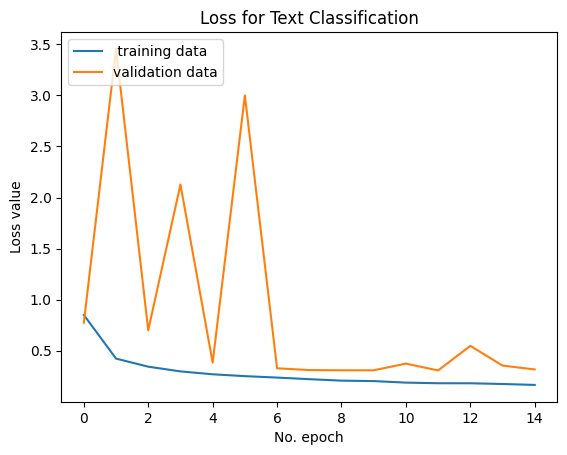

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

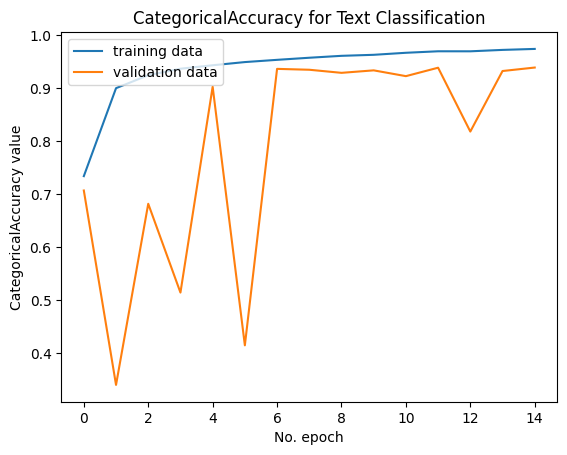

In [46]:
plt.plot(history.history['accuracy'], label='training data')
plt.plot(history.history['val_accuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [47]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

In [48]:
print("Generate predictions for all samples")
predictions = best_model.predict(test_padded)
print(predictions)
predict_results = predictions.argmax(axis=1)

Generate predictions for all samples
375/375 [==============================] - 15s 38ms/step
[[9.9894232e-01 8.5868995e-04 1.9900886e-04]
 [5.1372382e-04 1.4135937e-03 9.9807262e-01]
 [9.9847215e-01 1.2278330e-03 2.9990534e-04]
 ...
 [7.5683126e-04 9.9868387e-01 5.5925822e-04]
 [3.1284359e-04 9.9946886e-01 2.1830862e-04]
 [5.4830028e-04 1.4828157e-03 9.9796885e-01]]


In [49]:
print(predict_results.shape)
if len(predict_results.shape) == 1:
    y_pred = predict_results
else:
    y_pred = np.argmax(predict_results, axis=1)

print(y_pred)

(12000,)
[0 2 0 ... 1 1 2]


In [50]:
from sklearn.metrics import accuracy_score
y_test=test_labels
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 93.39%


Text(50.722222222222214, 0.5, 'y_pred')

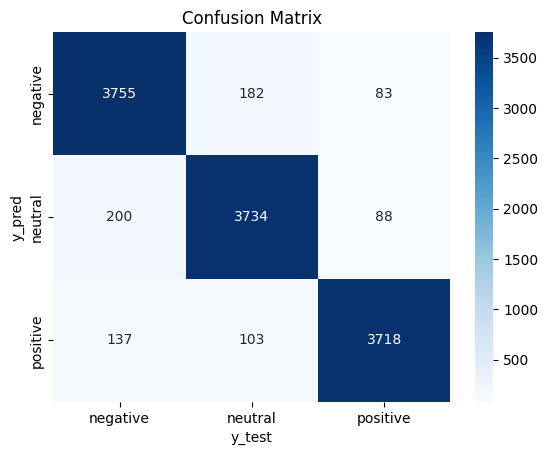

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [52]:
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

    negative       0.92      0.93      0.93      4020
     neutral       0.93      0.93      0.93      4022
    positive       0.96      0.94      0.95      3958

    accuracy                           0.93     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.93      0.93      0.93     12000



In [72]:
from IPython.display import display

separated_app_data = ['app1_data1_separated', 'app2_data1_separated'] # Name accordingly for more apps 
review_data_sources = ['ReviewData1', 'ReviewData2']  # List of corresponding review data sources

separated_data = {}
unique_separated_data = {}

for app, review_source in zip(separated_app_data, review_data_sources):
    separated_data[app] = combined_app_data_vader[combined_app_data_vader['source'] == review_source].drop(columns=['source'])
    
    # Exclude matching data using a merge with indicator
    merged_data = separated_data[app].merge(balanced_data_CA_vader, how='left', indicator=True)
    unique_separated_data[app] = merged_data[merged_data['_merge'] == 'left_only'].drop(columns=['_merge', 'source'])
    
    print(f'{app} DataFrame\n\n')
    unique_separated_data[app].reset_index(drop=True, inplace=True)
    display(unique_separated_data[app])
    print('\n\n')


app1_data1_separated DataFrame




,ID,CleanText,rating,sentiment_vader,sentiment_encoded
0,3,great easy navigate use super easy,5,positive,2
1,5,easy use great rates love meeting host super f...,5,positive,2
2,7,host unavailable due overseas wait hour enter ...,1,positive,2
3,8,good easy reference customers dont reply,4,positive,2
4,9,dumpster fire,1,negative,0
...,...,...,...,...,...
76853,147595,love work actually useful travelers look cheap...,5,positive,2
76854,147596,please add search filters pets allow,2,positive,2
76855,147598,since last time update featured collection cat...,3,negative,0
76856,147599,useful ive use quickly compose messages hosts ...,4,positive,2





app2_data1_separated DataFrame




,ID,CleanText,rating,sentiment_vader,sentiment_encoded
0,1,customer support available though marked websi...,1,positive,2
1,2,trust issues sell fake hotel,1,positive,2
2,4,slow,3,neutral,1
3,5,bad hard talk customer service request refund ...,1,negative,0
4,7,ok whatever,2,positive,2
...,...,...,...,...,...
40237,84689,try type venice search function crashes immedi...,1,negative,0
40238,84692,clean room many facilities u ask towel soap mi...,5,positive,2
40239,84693,good guide travels asia good choice hotels pic...,2,positive,2
40240,84694,useful times use,4,positive,2


In [88]:
for app_key in separated_app_data:
  print(f"Generate predictions for all samples of {app_key}")
  test_sequences_apps = tokenizer.texts_to_sequences(unique_separated_data[app_key]['CleanText'])
  test_padded_apps = pad_sequences(test_sequences_apps, padding='post', maxlen=max_length)  
  predictions_apps = best_model.predict(test_padded_apps)
  predict_results_apps = predictions_apps.argmax(axis=1)
  print(predict_results_apps.shape)
  if len(predict_results_apps.shape) == 1:
     y_pred_apps = predict_results_apps
  else:
     y_pred_apps = np.argmax(predict_results_apps, axis=1)
  y_test_apps = unique_separated_data[app_key]['sentiment_encoded']
  accuracy_apps = accuracy_score(y_test_apps, y_pred_apps)  
  print(y_pred_apps)
  print(f'\n\nAccuracy of {app_key}: {accuracy_apps * 100:.2f}%')  

Generate predictions for all samples of app1_data1_separated
2402/2402 [==============================] - 89s 37ms/step
(76858,)
[2 2 2 ... 1 2 0]


Accuracy of app1_data1_separated: 94.17%
Generate predictions for all samples of app2_data1_separated
1258/1258 [==============================] - 46s 37ms/step
(40242,)
[2 1 1 ... 2 2 2]


Accuracy of app2_data1_separated: 94.71%
